# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [4]:
# Load pickled data
import pickle
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd 
from IPython.core.display import display,HTML

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# TODO: fill this in based on where you saved the training and testing data
training_file = "signs_dataset/train.p"
testing_file = "signs_dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(np.unique(test['labels']))

# Read the signames csv file
signs_file = "./signnames.csv"
df = pd.read_csv(signs_file)

def print_centered(string):
    print(" "*(58-int(len(string)/2)) + string)
    
def print_header(string):
    print("_"*116 + "\n")
    print_centered(string)
    print("_"*116 + "\n")

display(HTML("<hr><h3> Basic dataset summary </h3><hr>"))
#print("_"*116 + "\n")
#print_centered("BASIC DATA SUMMARY")
#print("_"*116 + "\n")
#rint("Number of training examples =", n_train)
print("Number of testing examples =\t", n_test)
print("Image data shape =\t\t", image_shape)
print("Number of classes =\t\t", n_classes)
print("_"*116 + "\n")
print_centered("CLASSES AND NAMES")
print("_"*116 + "\n")
print(df)
print("_"*116 + "\n")


Number of testing examples =	 12630
Image data shape =		 (32, 32, 3)
Number of classes =		 43
____________________________________________________________________________________________________________________

                                                  CLASSES AND NAMES
____________________________________________________________________________________________________________________

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                        

### Dataset Analysis
A brief analysis of the balance of the datasets payload

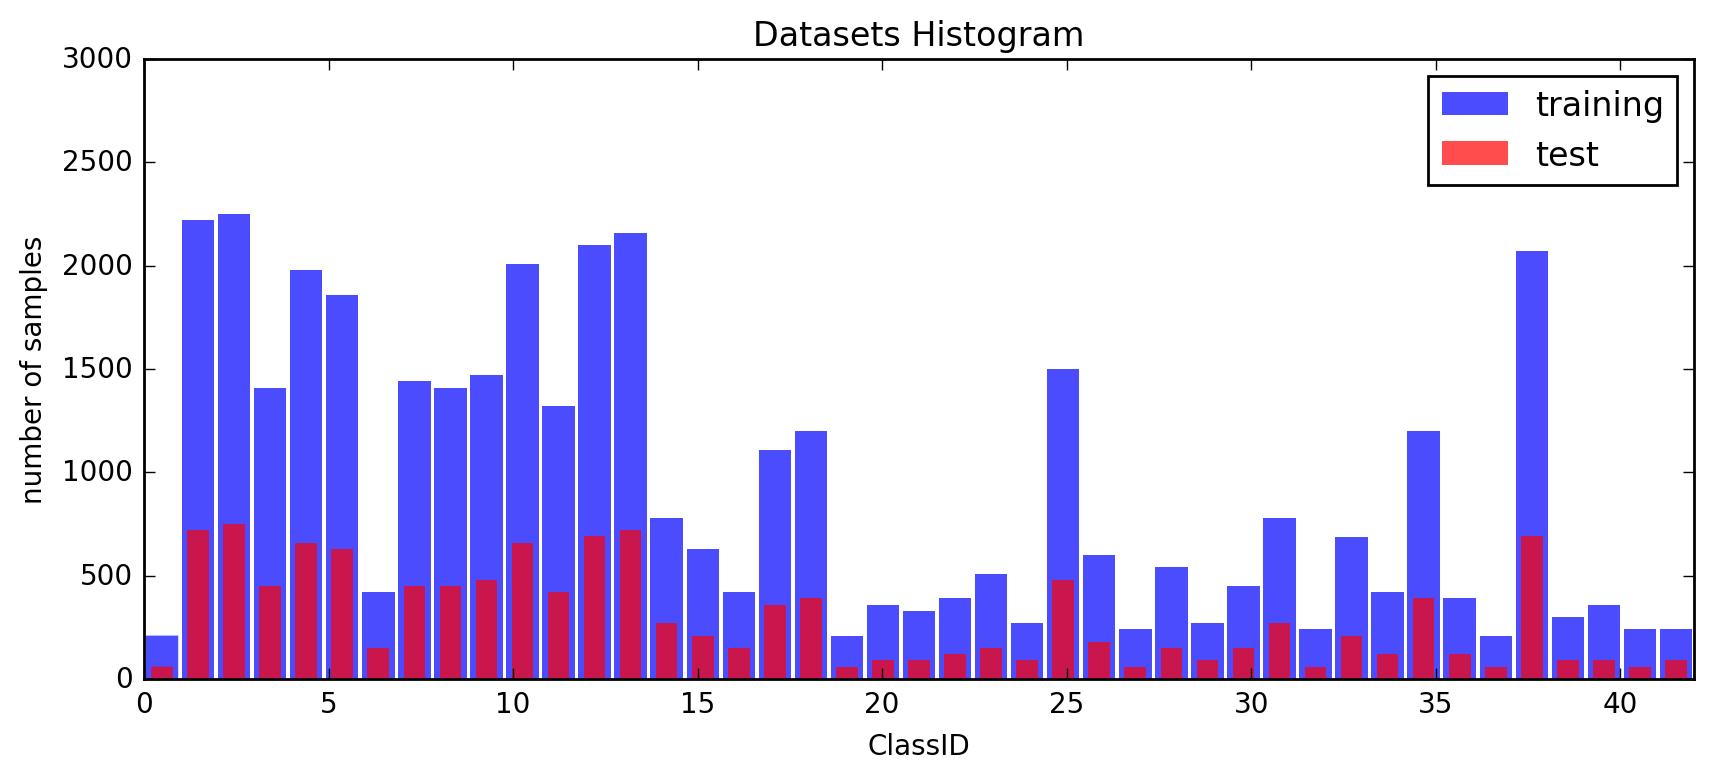

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
def plot_histogram(dataset1, dataset2, n_classes, title="dataset histogram"):
    #plt.figure(figsize=(11,5))
    plt.figure(figsize=(10,4))
    plt.hist(dataset1, n_classes, lw=0., facecolor='b', alpha=.7, rwidth=0.9, label='training')
    plt.hist(dataset2, n_classes, lw=0., facecolor='r', alpha=.7, rwidth=0.6, label='test')
    plt.title(title)
    plt.xlabel("ClassID")
    plt.ylabel("number of samples")
    plt.legend()
    # plt.grid()
    plt.axis((0,42,0,3000))
    # plt.xticks(np.arange(0, 45, 1))
    plt.show()

plot_histogram(y_train, y_test, n_classes, "Datasets Histogram")

### Dataset Visualization
Some random visualizations of the datasets images. I used the provided bounding box coordinates information to crop the images removing those unnecessary parts.

____________________________________________________________________________________________________________________

                                             some testing dataset images
____________________________________________________________________________________________________________________



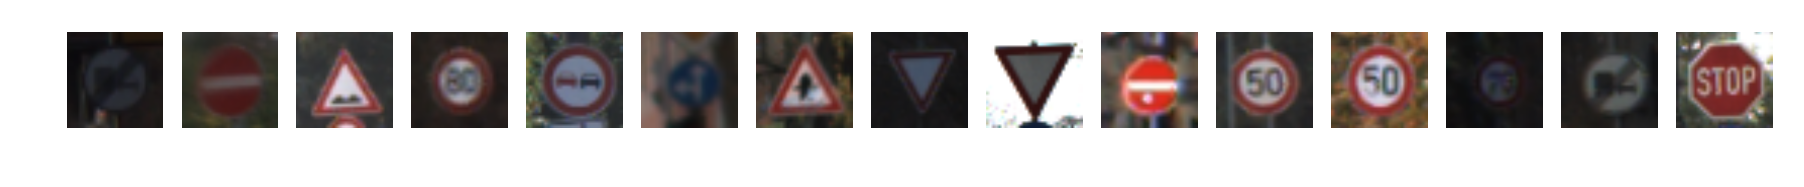

____________________________________________________________________________________________________________________

                                            some training dataset images
____________________________________________________________________________________________________________________



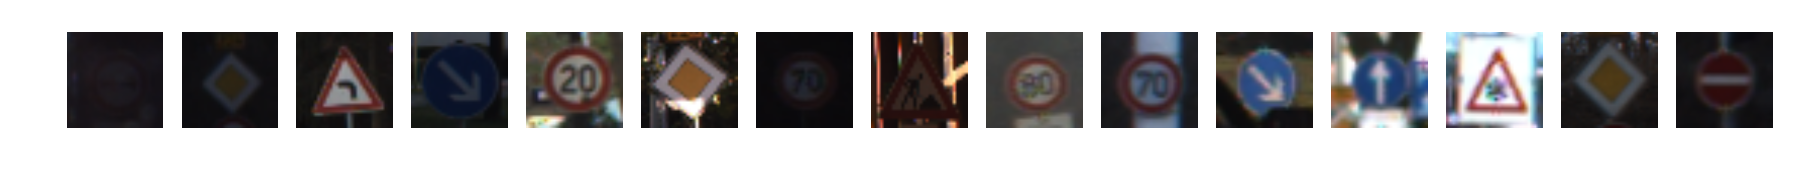

In [7]:
import random

# TODO: to delete
def re_center(dataset):
    """
    recenter the image using the coords and original size information
    
    """
    new_dataset = []
    #i=0
    for f, l, s, c in zip(dataset['features'], dataset['labels'], dataset['sizes'], dataset['coords']):
        x1 = c[0]/s[0] * 32
        y1 = c[1]/s[1] * 32
        x2 = c[2]/s[0] * 32
        y2 = c[3]/s[1] * 32

        pts1 = np.float32([[x1,y1],[x2,y1],[x1,y2],[x2,y2]])
        pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])

        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(f,M,(32,32))
        new_dataset.append(dst)

    return new_dataset


# TODO: to delete
def re_center_old(dataset):
    """
    recenter the image using the coords and original size information
    
    """
    new_dataset = []
    i=0
    for f, l, s, c in zip(dataset['features'], dataset['labels'], dataset['sizes'], dataset['coords']):
        x1 = c[0]/s[0] * 32
        y1 = c[1]/s[1] * 32
        x2 = c[2]/s[0] * 32
        y2 = c[3]/s[1] * 32

        pts1 = np.float32([[x1,y1],[x2,y1],[x1,y2],[x2,y2]])
        pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])

        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(f,M,(32,32))
        new_dataset.append(dst)
        if i%5555 == 0:
            fig = plt.figure()
            a = fig.add_subplot(1,4,1, aspect='equal')
            a.imshow(f)
            a.add_patch(patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r',facecolor='none'))

            a=fig.add_subplot(1,4,2, aspect='equal')
            a.imshow(dst)
        i +=1
    
    plt.show()
    return new_dataset


def plot_5ximage(image_array):
    """ some docu here"""
    i = 1
    fig = plt.figure(figsize=(11,1))
    
    for image in image_array:
        a = fig.add_subplot(1,15,i)
        a.imshow(image)
        plt.axis('off')
        i +=1
    plt.show()



random_subset = random.sample(range(len(test['features'])),15)
print_header("some testing dataset images")
plot_5ximage(test['features'][random_subset])
#plot_5ximage(X_test[random_subset])

random_subset = random.sample(range(len(train['features'])),15)
print_header("some training dataset images")
plot_5ximage(train['features'][random_subset])
#plot_5ximage(X_train[random_subset])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

re centering datasets...
____________________________________________________________________________________________________________________

                                some testing dataset images (original and recentered)
____________________________________________________________________________________________________________________



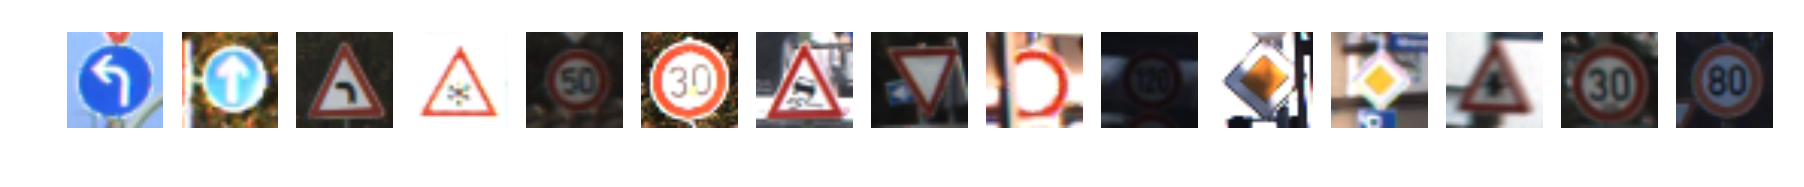

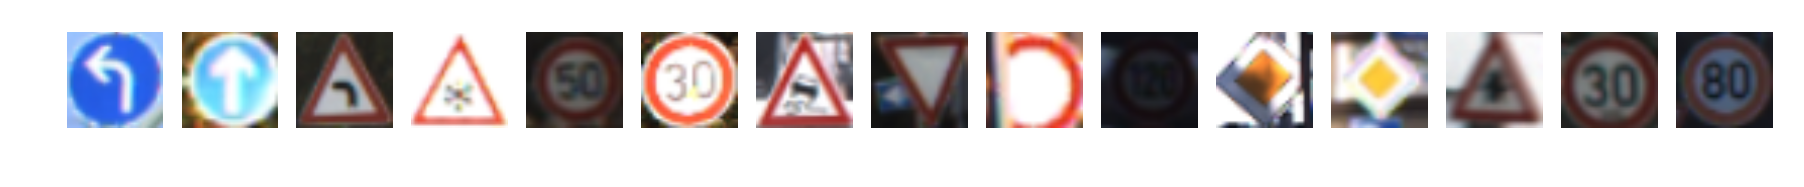

____________________________________________________________________________________________________________________

                               some training dataset images (original and recentered)
____________________________________________________________________________________________________________________



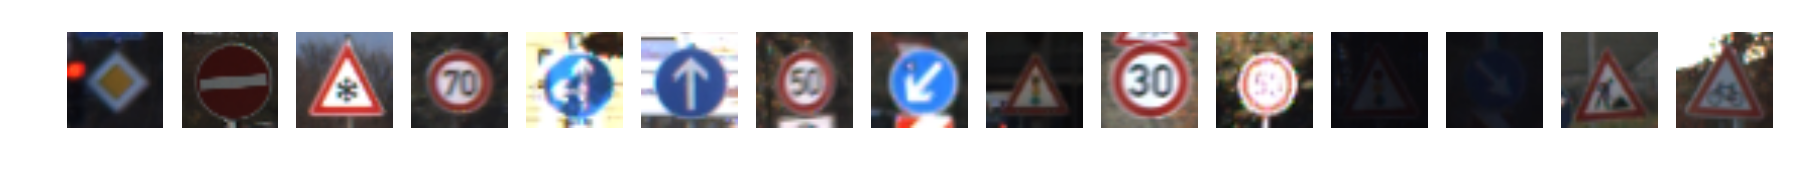

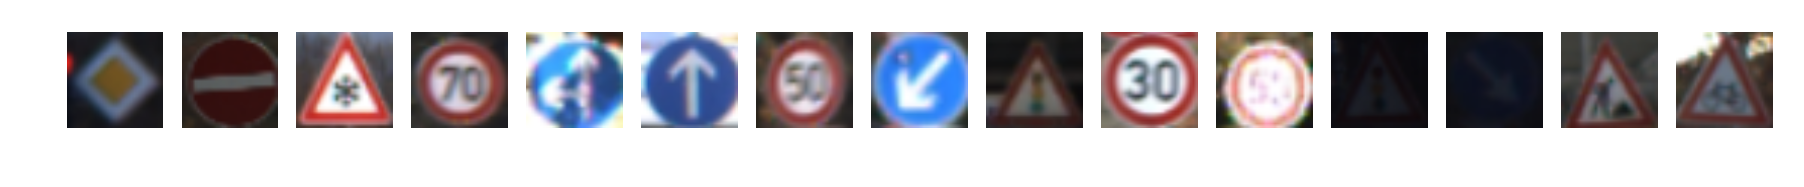

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

def re_center(dataset):
    """
    recenter the image using the coords and original size information
    
    """
    new_dataset = []
    #i=0
    for f, l, s, c in zip(dataset['features'], dataset['labels'], dataset['sizes'], dataset['coords']):
        x1 = c[0]/s[0] * 32
        y1 = c[1]/s[1] * 32
        x2 = c[2]/s[0] * 32
        y2 = c[3]/s[1] * 32

        pts1 = np.float32([[x1,y1],[x2,y1],[x1,y2],[x2,y2]])
        pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])

        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(f,M,(32,32))
        new_dataset.append(dst)

    return new_dataset



# first of all: recenter the images using the boundary mask information:
print('re centering datasets...')
X_train = np.array(re_center(train))
X_test = np.array(re_center(test))


# rndering some random images of training and testing datasets:
random_subset_test = random.sample(range(len(test['features'])),15)
print_header("some testing dataset images (original and recentered)")
plot_5ximage(test['features'][random_subset_test])
plot_5ximage(X_test[random_subset_test])

random_subset_train = random.sample(range(len(train['features'])),15)
print_header("some training dataset images (original and recentered)")
plot_5ximage(train['features'][random_subset_train])
plot_5ximage(X_train[random_subset_train])




In [9]:
import cv2
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def equalize(img):
    return cv2.equalizeHist(img)

features =[]
for i in range(len(X_train)):
    features.append(grayscale(X_train[i]))
X_train = np.asarray(features)

features =[]
for i in range(len(X_train)):
    features.append(equalize(X_train[i]))
X_train = np.asarray(features)



features =[]
for i in range(len(X_test)):
    features.append(grayscale(X_test[i]))
X_test = np.asarray(features)

features =[]
for i in range(len(X_test)):
    features.append(equalize(X_test[i]))
X_test = np.asarray(features)






____________________________________________________________________________________________________________________

                                             gray samples test and train
____________________________________________________________________________________________________________________



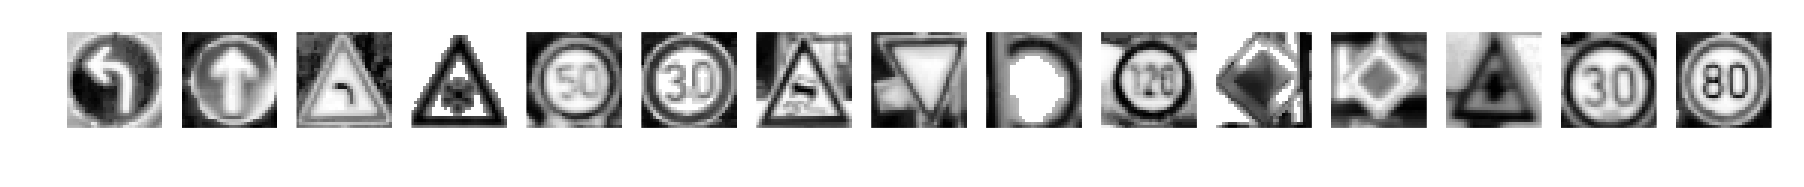

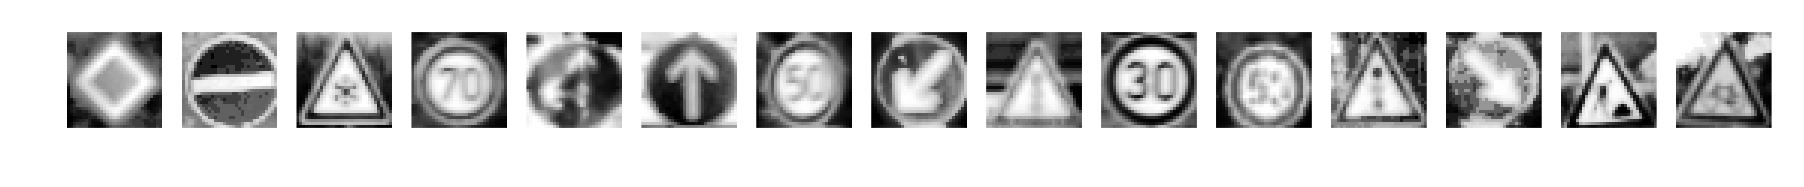

In [10]:
def plot_5ximage_gray(image_array):
    """ some docu here"""
    i = 1
    fig = plt.figure(figsize=(11,1))
    
    for image in image_array:
        a = fig.add_subplot(1,15,i)
        a.imshow(image,cmap = "gray", interpolation = "none")
        plt.axis('off')
        i +=1
    plt.show()

#random_subset = random.sample(range(len(X_test)),15)
print_header("gray samples test and train")
plot_5ximage_gray(X_test[random_subset_test])
   
    
#random_subset = random.sample(range(len(X_train)),15)
#print_header("train gray samples")
plot_5ximage_gray(X_train[random_subset_train])



In [11]:
####################################################################################

def normalize_greyscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-0.5, 0.5]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    return (image_data - np.abs(np.mean(image_data)))*0.5/np.max(image_data - np.abs(np.mean(image_data)))
    
    
    a = -0.5  #0.1
    b =  0.5  #0.9
    x_min = np.min(image_data)  #0
    x_max = np.max(image_data)  #255
    
    return a + (image_data - x_min) * (b - a) / (x_max - x_min)


X_train_norm = normalize_greyscale(X_train)
X_test_norm = normalize_greyscale(X_test)


____________________________________________________________________________________________________________________

                                   normalized and equalized test and train samples
____________________________________________________________________________________________________________________



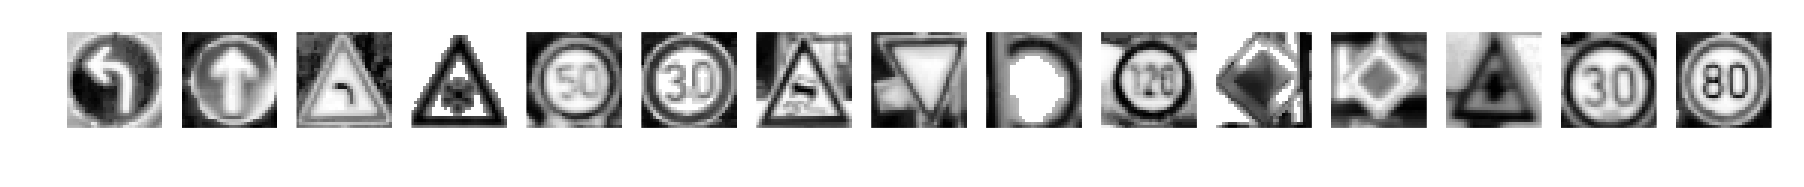

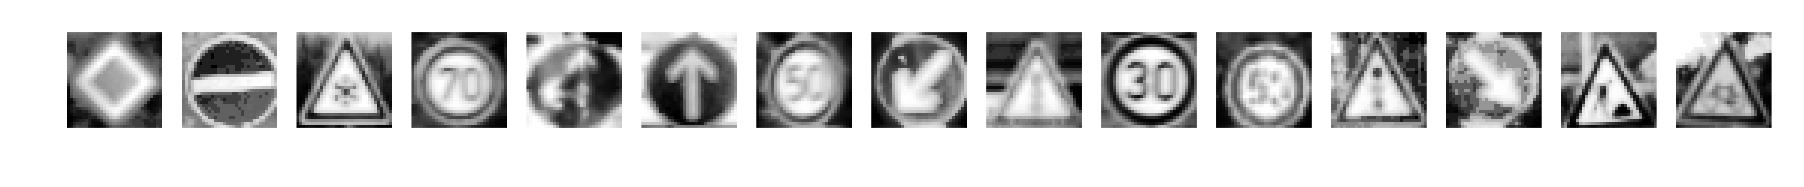

In [12]:
def plot_5ximage_gray(image_array):
    """ some docu here"""
    i = 1
    fig = plt.figure(figsize=(11,1))
    
    for image in image_array:
        a = fig.add_subplot(1,15,i)
        a.imshow(image, cmap = "gray", interpolation = "none")
        plt.axis('off')
        i +=1
    plt.show()

    
#random_subset = random.sample(range(len(X_test)),15)
print_header("normalized and equalized test and train samples")
plot_5ximage_gray(X_test_norm[random_subset_test])


#random_subset = random.sample(range(len(X_train)),15)
#print_header("train gray samples")
plot_5ximage_gray(X_train_norm[random_subset_train])

X_train_flatt = [np.ravel(e) for e in X_train_norm]
X_test_flatt = [np.ravel(e) for e in X_test_norm]


In [13]:
from sklearn.model_selection import train_test_split

# Change label encoding
def onehot_encoding(originals, n_classes):
    """ Changes the label encoding from an integer representing the class to one-hot """
    labels = np.zeros((originals.shape[0], n_classes))
    for index, label in enumerate(originals): labels[index, label] = 1.0
    labels = labels.reshape((-1, n_classes))
    return labels


# split training dataset into training and validation subsets:
train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train_flatt,
    y_train,
    test_size=0.1,
    random_state=123456)

# Transform the dataset labels
train_labels = onehot_encoding(train_labels, n_classes)
valid_labels = onehot_encoding(valid_labels, n_classes)
test_labels = onehot_encoding(y_test, n_classes)

train_cls = np.array([label.argmax() for label in train_labels])
valid_cls = np.array([label.argmax() for label in valid_labels])
test_cls = np.array([label.argmax() for label in test_labels])

#print(train_labels[0])
#print(test_labels[0])

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [14]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# We know that signs images are 32 pixels in each dimension.
img_size = 32

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = n_classes

In [16]:
# TODO: implement a checkpoint control here to save the datasets to disk

In [17]:
# Test importing all required packages
import tensorflow as tf
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import cv2
import os
import pickle
from tqdm import tqdm
import math
import time

In [18]:
# Placeholders variables
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [19]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [20]:
logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [21]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

In [23]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [24]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
session = tf.Session()

In [26]:
session.run(tf.initialize_all_variables())

In [27]:
batch_size = 1000

In [28]:
#print(train_labels[0:10])
#print(test_labels[0:10])


In [29]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        random_indices = random.sample(range(len(train_features)), batch_size)
        x_batch = [train_features[index] for index in random_indices] #data.train.next_batch(batch_size)
        y_true_batch = [train_labels[index] for index in random_indices]
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

In [46]:
feed_dict_test = {x: X_test_flatt,
                  y_true: test_labels,
                  y_true_cls: test_cls}

feed_dict_validation = {x: valid_features,
                        y_true: valid_labels,
                        y_true_cls: valid_cls}

In [51]:
def print_test_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test set: {0:.1%}".format(acc))

In [52]:
def print_validation_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_validation)
    
    # Print the accuracy.
    print("Accuracy on validation set: {0:.1%}".format(acc))

In [32]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = test_cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [33]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
        
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = test_cls[correct]

    # Get the true classes for those images.
    cls_true = test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [73]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)
    
   
    i = 1
    fig = plt.figure(figsize=(11,1))

    for img in w:
        image = w[:, i].reshape(img_shape)
        a = fig.add_subplot(1,15,i)
        a.imshow(image)
        plt.axis('off')
        i +=1
    plt.show()
    return

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
   
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<43:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [36]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [68]:
print_validation_accuracy()
print_test_accuracy()

Accuracy on validation set: 92.6%
Accuracy on test set: 86.7%


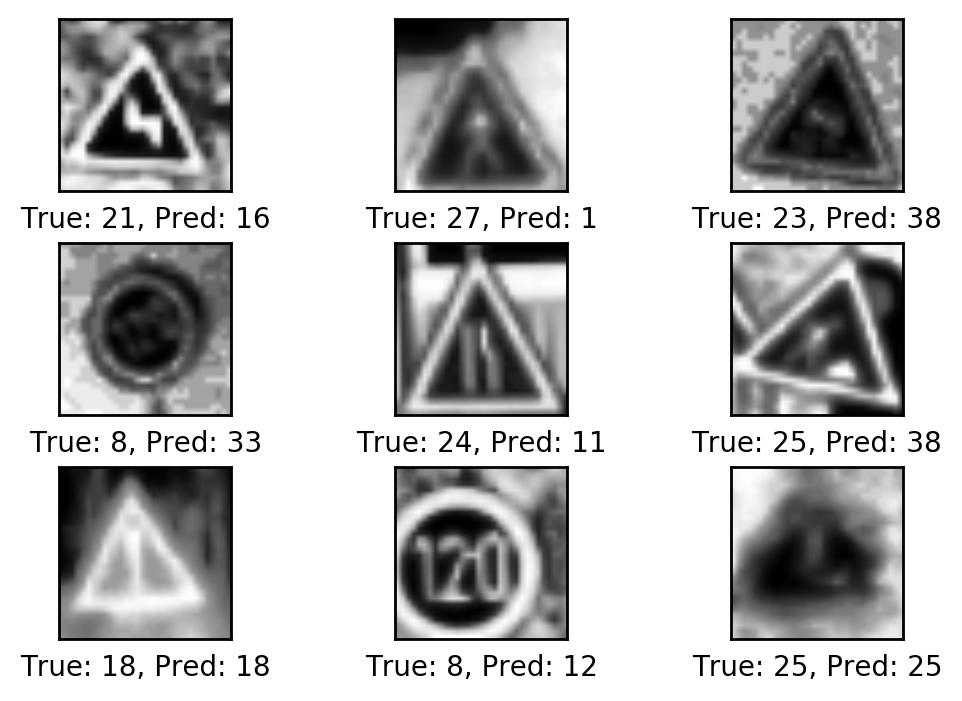

In [55]:
plot_example_errors()

In [61]:
optimize(num_iterations=2000)

In [67]:
print_validation_accuracy()
print_test_accuracy()

Accuracy on validation set: 92.6%
Accuracy on test set: 86.7%


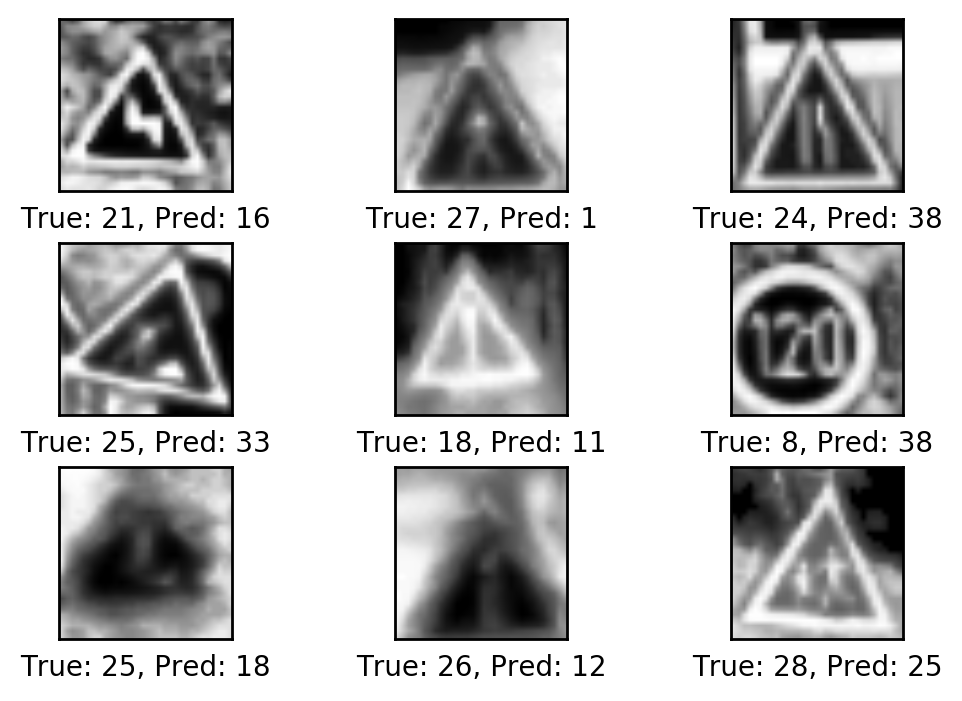

In [64]:
plot_example_errors()

In [69]:
optimize(num_iterations=2000)
print_validation_accuracy()
print_test_accuracy()


Accuracy on validation set: 93.1%
Accuracy on test set: 87.1%


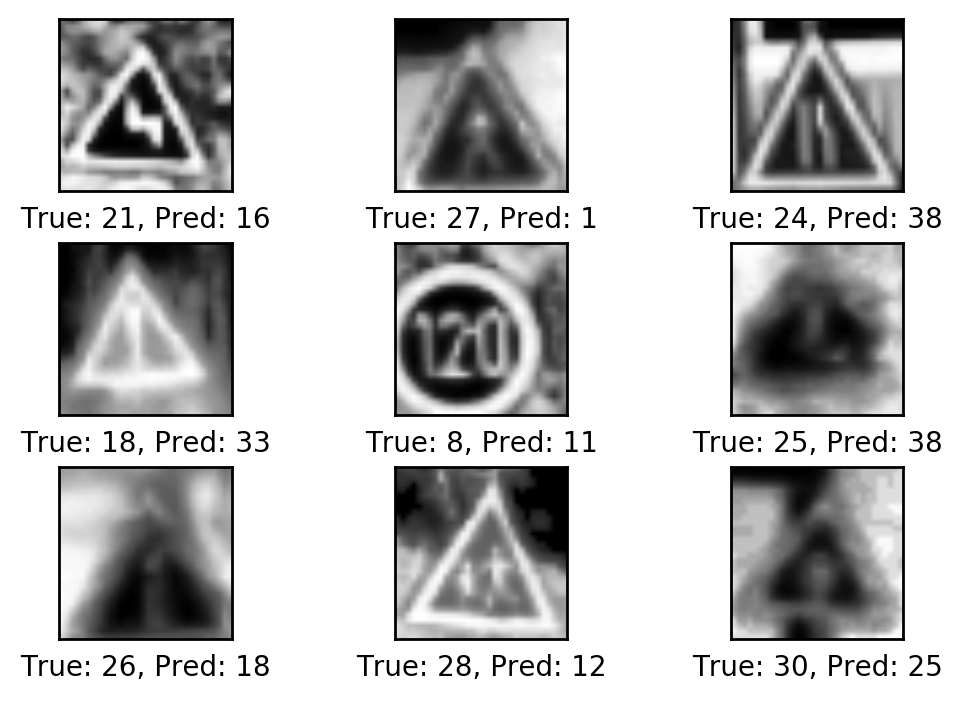

In [70]:
plot_example_errors()

ValueError: num must be 1 <= num <= 15, not 16

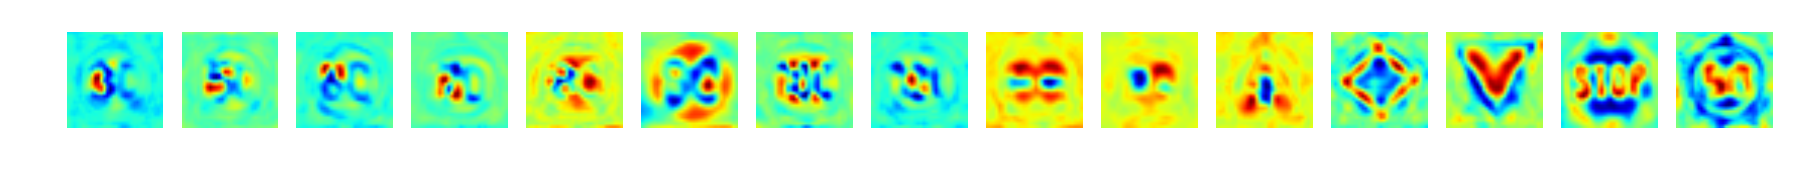

In [74]:
plot_weights()

In [72]:
print_confusion_matrix()

NameError: name 'confusion_matrix' is not defined

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [5]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.